# DIABETES DATASET PREPROCESSING USING KNN, SVM, & LOGISTIC REGRESSION


# Library

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from scipy.stats import ttest_rel
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold, cross_val_predict, StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay

# IMPORT DATASET
you can change this whenever u want to use another dataset

In [2]:
file_path = 'https://raw.githubusercontent.com/MadRapz/DatMin_Diabetes/main/clean_diabetes.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.tail())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.643357       0.456522       0.296703  0.169131  0.312115   
1     0.058824  0.202797       0.391304       0.230769  0.169131  0.168378   
2     0.470588  0.888112       0.369565       0.197802  0.132099  0.100616   
3     0.058824  0.230769       0.391304       0.164835  0.095066  0.199179   
4     0.000000  0.566434       0.108696       0.296703  0.184116  0.507187   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
995     0.447202  0.610745       0.430594       0.375744  0.129864  0.277333   
996     0.111329  0.395480       0.418076       0.272181  0.277918  0.293787 

# First Preprocessing

## Balancing Dataset
Lakukan Balancing jika dataset baru!

In [ ]:
# Tampilkan distribusi kelas sebelum balancing
print('Distribusi kelas sebelum balancing:')
print(df['Outcome'].value_counts())

# Pisahkan fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Terapkan SMOTE untuk balancing data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Gabungkan kembali fitur dan target yang sudah seimbang
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Outcome'])], axis=1)

# Tampilkan distribusi kelas setelah balancing
print('\nDistribusi kelas setelah balancing:')
print(balanced_df['Outcome'].value_counts())

# Simpan dataset yang sudah seimbang ke file baru
balanced_df.to_csv('balanced_diabetes.csv', index=False)

Distribusi kelas sebelum balancing:
Outcome
0    500
1    268
Name: count, dtype: int64

Distribusi kelas setelah balancing:
Outcome
1    500
0    500
Name: count, dtype: int64


## Cleansing Dataset

In [ ]:
fill_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def fill_zeros_with_neighbors(column):
    # Create a copy of the column to avoid modifying the original DataFrame
    filled_column = column.copy()

    # Calculate the mean of the column excluding zeros for edge cases
    mean_value = column[column != 0].mean()

    # Iterate through the column to fill zeros
    for i in range(len(filled_column)):
        if filled_column[i] == 0:
            # Find the nearest non-zero values above and below
            above = filled_column[i-1] if i > 0 and filled_column[i-1] != 0 else None
            below = filled_column[i+1] if i < len(filled_column) - 1 and filled_column[i+1] != 0 else None

            if above is not None and below is not None:
                filled_column[i] = (above + below) / 2
            elif above is not None:
                filled_column[i] = above
            elif below is not None:
                filled_column[i] = below
            else:
                filled_column[i] = mean_value

    return filled_column

In [ ]:
# Apply the function to each column
for column in fill_columns:
    df[column] = fill_zeros_with_neighbors(df[column])

# Display the first few rows of the modified dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.206522,0.133142,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


## Normalization Dataset

In [ ]:
# List fitur yang ingin dinormalisasi
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Normalisasi Min-Max
for column in selected_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)

# Data sudah ternormalisasi ke rentang 0 - 1
print(df[selected_columns].head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.643357       0.456522       0.296703  0.169131  0.312115   
1     0.058824  0.202797       0.391304       0.230769  0.169131  0.168378   
2     0.470588  0.888112       0.369565       0.197802  0.132099  0.100616   
3     0.058824  0.230769       0.391304       0.164835  0.095066  0.199179   
4     0.000000  0.566434       0.108696       0.296703  0.184116  0.507187   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  


## Save Clean Dataset

In [ ]:
df.to_csv('clean_diabetes.csv', index=False)

# KNN (Manhattan, Euclidean, & Chebyshev)

## **K = 5 (No Cross Validation)**

### All Feature and Euclidean


--- Evaluasi Model dengan Semua Fitur ---
Metric: euclidean all feature:
Accuracy: 0.7400, Precision: 0.6992, F1 Score: 0.7679, Recall: 0.8515



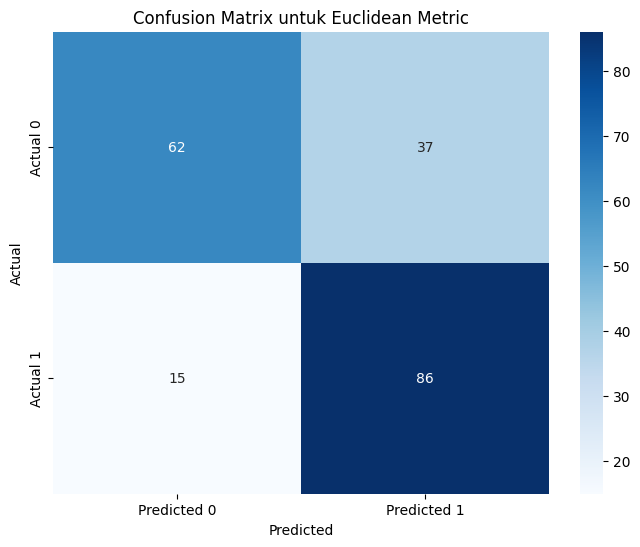

In [19]:
#-------------------- Melakukan split data 80:20 --------------------
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use only Euclidean distance
distance_metrics = ['euclidean']
results = []

print("\n--- Evaluasi Model dengan Semua Fitur ---")
for metric_name in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric_name)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    results.append({
        'metric': metric_name,
        'features': 'all features',
        'accuracy': acc,
        'f1': f1,
        'recall': recall,
        'precision': precision
    })

    # Print metrics
    print(f"Metric: {metric_name} all feature:")
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}\n")

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix untuk Euclidean Metric')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#-------------------- Melakukan split data 80:20 --------------------


# # -------------------- Tidak melakukan split data --------------------
# # Pisahkan fitur dan target
# X = df.drop(columns=['Outcome'])
# y = df['Outcome']

# # Gunakan hanya Euclidean distance
# distance_metrics = ['euclidean']
# results = []

# print("\n--- Evaluasi Model dengan Semua Fitur (Seluruh Data) ---")
# for metric_name in distance_metrics:
#     knn = KNeighborsClassifier(n_neighbors=5, metric=metric_name)

#     # Standardisasi fitur pada seluruh data
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)

#     # Latih model pada seluruh data
#     knn.fit(X_scaled, y)

#     # Prediksi pada seluruh data
#     y_pred = knn.predict(X_scaled)

#     # Hitung metrik evaluasi
#     acc = accuracy_score(y, y_pred)
#     f1 = f1_score(y, y_pred)
#     recall = recall_score(y, y_pred)
#     precision = precision_score(y, y_pred)

#     results.append({
#         'metric': metric_name,
#         'features': 'all features',
#         'accuracy': acc,
#         'f1': f1,
#         'recall': recall,
#         'precision': precision
#     })

#     # Tampilkan metrik evaluasi
#     print(f"Metric: {metric_name} all feature:")
#     print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}\n")

#     # Buat confusion matrix
#     cm = confusion_matrix(y, y_pred)

#     # Visualisasi confusion matrix
#     plt.figure(figsize=(8,6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
#                 xticklabels=['Predicted 0', 'Predicted 1'],
#                 yticklabels=['Actual 0', 'Actual 1'])
#     plt.title('Confusion Matrix untuk Euclidean Metric (Seluruh Data)')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()
# # -------------------- Tidak melakukan split data --------------------

### All Feature and Manhattan


--- Evaluasi Model dengan Semua Fitur ---
Metric: manhattan all feature:
Accuracy: 0.7300, Precision: 0.6822, F1 Score: 0.7652, Recall: 0.8713



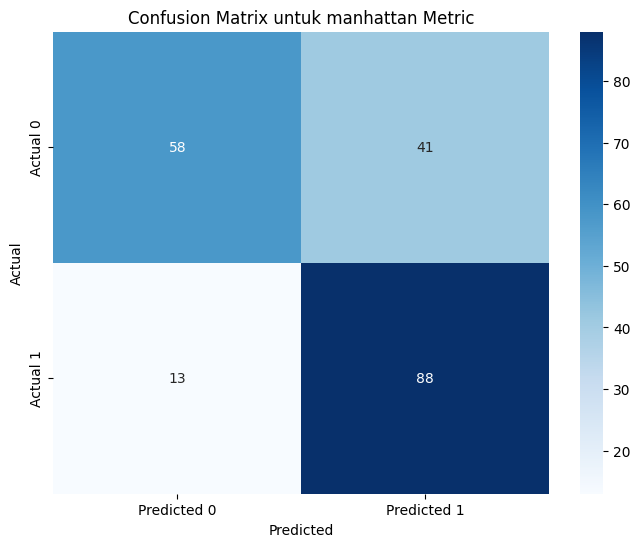

In [21]:
#-------------------- Melakukan split data 80:20 --------------------
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use only manhattan distance
distance_metrics = ['manhattan']
results = []

print("\n--- Evaluasi Model dengan Semua Fitur ---")
for metric_name in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric_name)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    results.append({
        'metric': metric_name,
        'features': 'all features',
        'accuracy': acc,
        'f1': f1,
        'recall': recall,
        'precision': precision
    })

    # Print metrics
    print(f"Metric: {metric_name} all feature:")
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}\n")

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix untuk manhattan Metric')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#-------------------- Melakukan split data 80:20 --------------------

# # -------------------- Tidak melakukan split data --------------------
# # Pisahkan fitur dan target
# X = df.drop(columns=['Outcome'])
# y = df['Outcome']

# # Gunakan hanya manhattan distance
# distance_metrics = ['manhattan']
# results = []

# print("\n--- Evaluasi Model dengan Semua Fitur (Seluruh Data) ---")
# for metric_name in distance_metrics:
#     knn = KNeighborsClassifier(n_neighbors=5, metric=metric_name)

#     # Standardisasi fitur pada seluruh data
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)

#     # Latih model pada seluruh data
#     knn.fit(X_scaled, y)

#     # Prediksi pada seluruh data
#     y_pred = knn.predict(X_scaled)

#     # Hitung metrik evaluasi
#     acc = accuracy_score(y, y_pred)
#     f1 = f1_score(y, y_pred)
#     recall = recall_score(y, y_pred)
#     precision = precision_score(y, y_pred)

#     results.append({
#         'metric': metric_name,
#         'features': 'all features',
#         'accuracy': acc,
#         'f1': f1,
#         'recall': recall,
#         'precision': precision
#     })

#     # Tampilkan metrik evaluasi
#     print(f"Metric: {metric_name} all feature:")
#     print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}\n")

#     # Buat confusion matrix
#     cm = confusion_matrix(y, y_pred)

#     # Visualisasi confusion matrix
#     plt.figure(figsize=(8,6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
#                 xticklabels=['Predicted 0', 'Predicted 1'],
#                 yticklabels=['Actual 0', 'Actual 1'])
#     plt.title('Confusion Matrix untuk manhattan Metric (Seluruh Data)')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()
# # -------------------- Tidak melakukan split data --------------------

### All Feature and Chebyshev


--- Evaluasi Model dengan Semua Fitur ---
Metric: chebyshev all feature:
Accuracy: 0.7150, Precision: 0.6803, F1 Score: 0.7444, Recall: 0.8218



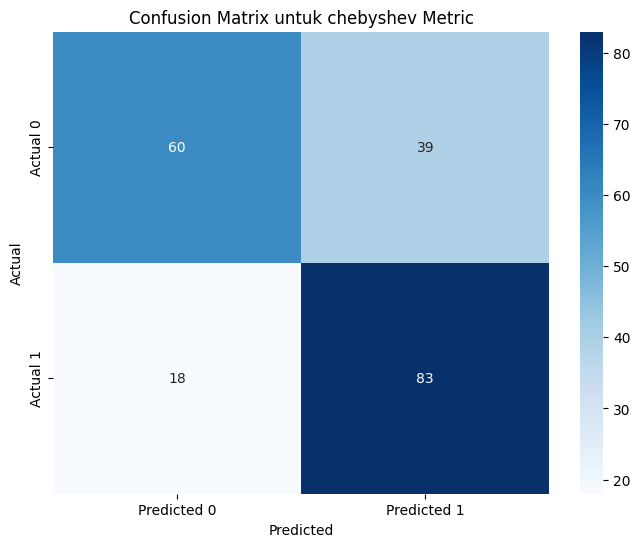

In [22]:
#-------------------- Melakukan split data 80:20 --------------------
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use only chebyshev distance
distance_metrics = ['chebyshev']
results = []

print("\n--- Evaluasi Model dengan Semua Fitur ---")
for metric_name in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric_name)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    results.append({
        'metric': metric_name,
        'features': 'all features',
        'accuracy': acc,
        'f1': f1,
        'recall': recall,
        'precision': precision
    })

    # Print metrics
    print(f"Metric: {metric_name} all feature:")
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}\n")

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix untuk chebyshev Metric')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#-------------------- Melakukan split data 80:20 --------------------

# # -------------------- Tidak melakukan split data --------------------
# # Pisahkan fitur dan target
# X = df.drop(columns=['Outcome'])
# y = df['Outcome']

# # Gunakan hanya chebyshev distance
# distance_metrics = ['chebyshev']
# results = []

# print("\n--- Evaluasi Model dengan Semua Fitur (Seluruh Data) ---")
# for metric_name in distance_metrics:
#     knn = KNeighborsClassifier(n_neighbors=5, metric=metric_name)

#     # Standardisasi fitur pada seluruh data
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)

#     # Latih model pada seluruh data
#     knn.fit(X_scaled, y)

#     # Prediksi pada seluruh data
#     y_pred = knn.predict(X_scaled)

#     # Hitung metrik evaluasi
#     acc = accuracy_score(y, y_pred)
#     f1 = f1_score(y, y_pred)
#     recall = recall_score(y, y_pred)
#     precision = precision_score(y, y_pred)

#     results.append({
#         'metric': metric_name,
#         'features': 'all features',
#         'accuracy': acc,
#         'f1': f1,
#         'recall': recall,
#         'precision': precision
#     })

#     # Tampilkan metrik evaluasi
#     print(f"Metric: {metric_name} all feature:")
#     print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}\n")

#     # Buat confusion matrix
#     cm = confusion_matrix(y, y_pred)

#     # Visualisasi confusion matrix
#     plt.figure(figsize=(8,6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
#                 xticklabels=['Predicted 0', 'Predicted 1'],
#                 yticklabels=['Actual 0', 'Actual 1'])
#     plt.title('Confusion Matrix untuk chebyshev Metric (Seluruh Data)')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()
# # -------------------- Tidak melakukan split data --------------------

## **K = 5 (With Cross Validation)**

### All Feature & Euclidean


--- Evaluasi Model dengan Semua Fitur ---
Fold - 1, euclidean all feature:
Accuracy: 0.7400, Precision: 0.7000, F1 Score: 0.7636, Recall: 0.8400

Fold - 2, euclidean all feature:
Accuracy: 0.7500, Precision: 0.7119, F1 Score: 0.7706, Recall: 0.8400

Fold - 3, euclidean all feature:
Accuracy: 0.8300, Precision: 0.7895, F1 Score: 0.8411, Recall: 0.9000

Fold - 4, euclidean all feature:
Accuracy: 0.7900, Precision: 0.7377, F1 Score: 0.8108, Recall: 0.9000

Fold - 5, euclidean all feature:
Accuracy: 0.7600, Precision: 0.7321, F1 Score: 0.7736, Recall: 0.8200

Fold - 6, euclidean all feature:
Accuracy: 0.8000, Precision: 0.7679, F1 Score: 0.8113, Recall: 0.8600

Fold - 7, euclidean all feature:
Accuracy: 0.7700, Precision: 0.7143, F1 Score: 0.7965, Recall: 0.9000

Fold - 8, euclidean all feature:
Accuracy: 0.8000, Precision: 0.7586, F1 Score: 0.8148, Recall: 0.8800

Fold - 9, euclidean all feature:
Accuracy: 0.7800, Precision: 0.7258, F1 Score: 0.8036, Recall: 0.9000

Fold - 10, euclidean 

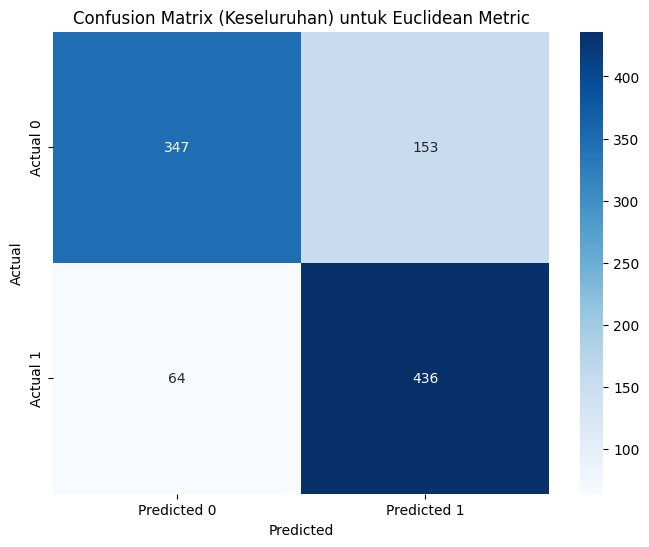

In [6]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Gunakan hanya Euclidean distance
distance_metrics = ['euclidean']

# Inisialisasi KFold untuk Cross-Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

print("\n--- Evaluasi Model dengan Semua Fitur ---")
for metric_name in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric_name)

    f1_scores = []
    recall_scores = []
    precision_scores = []
    acc_scores = []

    # Simpan semua prediksi dan label sebenarnya
    all_y_true = []
    all_y_pred = []

    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Standardisasi fitur
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # Simpan hasil prediksi untuk total confusion matrix
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        # Hitung metrik evaluasi
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        acc_scores.append(acc)
        f1_scores.append(f1)
        recall_scores.append(recall)
        precision_scores.append(precision)

        # Tampilkan metrik per fold
        print(f"Fold - {fold+1}, {metric_name} all feature:")
        print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}\n")

    # Hitung rata-rata metrik
    acc_mean = np.mean(acc_scores)
    f1_mean = np.mean(f1_scores)
    recall_mean = np.mean(recall_scores)
    precision_mean = np.mean(precision_scores)

    results.append({
        'metric': metric_name,
        'features': 'all features',
        'accuracy': acc_mean,
        'f1': f1_mean,
        'recall': recall_mean,
        'precision': precision_mean
    })

    # Buat confusion matrix keseluruhan
    total_cm = confusion_matrix(all_y_true, all_y_pred)

    # Visualisasi heatmap confusion matrix keseluruhan
    plt.figure(figsize=(8,6))
    sns.heatmap(total_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix (Keseluruhan) untuk Euclidean Metric')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    # plt.savefig('euclidean_confusion_matrix_total.png')
    plt.show()

# # Simpan hasil ke DataFrame dan CSV
# results_df = pd.DataFrame(results)
# print("\nRingkasan Hasil Cross-Validation:")
# print(results_df)
# results_df.to_csv('kNN_CrossVal.csv', index=False)

### All Feature & Manhattan


--- Evaluasi Model dengan Semua Fitur ---
Fold - 1, manhattan all feature:
Accuracy: 0.7600, Precision: 0.7097, F1 Score: 0.7857, Recall: 0.8800

Fold - 2, manhattan all feature:
Accuracy: 0.7700, Precision: 0.7288, F1 Score: 0.7890, Recall: 0.8600

Fold - 3, manhattan all feature:
Accuracy: 0.8500, Precision: 0.8070, F1 Score: 0.8598, Recall: 0.9200

Fold - 4, manhattan all feature:
Accuracy: 0.8100, Precision: 0.7627, F1 Score: 0.8257, Recall: 0.9000

Fold - 5, manhattan all feature:
Accuracy: 0.7500, Precision: 0.7193, F1 Score: 0.7664, Recall: 0.8200

Fold - 6, manhattan all feature:
Accuracy: 0.7800, Precision: 0.7500, F1 Score: 0.7925, Recall: 0.8400

Fold - 7, manhattan all feature:
Accuracy: 0.7500, Precision: 0.7119, F1 Score: 0.7706, Recall: 0.8400

Fold - 8, manhattan all feature:
Accuracy: 0.8100, Precision: 0.7541, F1 Score: 0.8288, Recall: 0.9200

Fold - 9, manhattan all feature:
Accuracy: 0.7600, Precision: 0.7167, F1 Score: 0.7818, Recall: 0.8600

Fold - 10, manhattan 

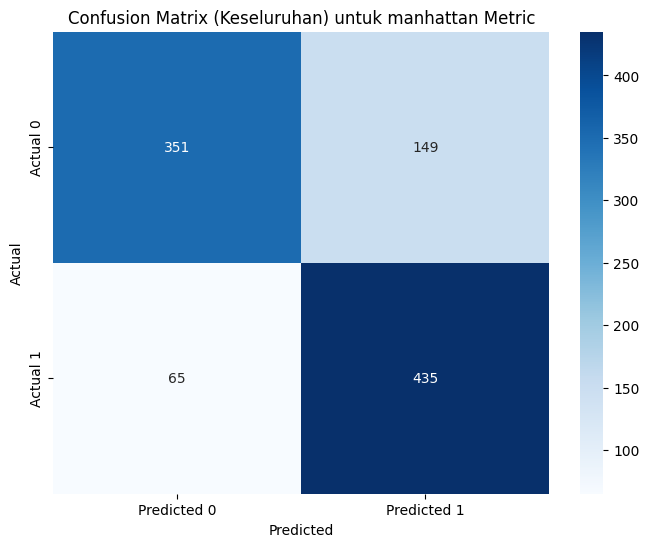

In [7]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Gunakan hanya manhattan distance
distance_metrics = ['manhattan']

# Inisialisasi KFold untuk Cross-Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

print("\n--- Evaluasi Model dengan Semua Fitur ---")
for metric_name in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric_name)

    f1_scores = []
    recall_scores = []
    precision_scores = []
    acc_scores = []

    # Simpan semua prediksi dan label sebenarnya
    all_y_true = []
    all_y_pred = []

    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Standardisasi fitur
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # Simpan hasil prediksi untuk total confusion matrix
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        # Hitung metrik evaluasi
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        acc_scores.append(acc)
        f1_scores.append(f1)
        recall_scores.append(recall)
        precision_scores.append(precision)

        # Tampilkan metrik per fold
        print(f"Fold - {fold+1}, {metric_name} all feature:")
        print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}\n")

    # Hitung rata-rata metrik
    acc_mean = np.mean(acc_scores)
    f1_mean = np.mean(f1_scores)
    recall_mean = np.mean(recall_scores)
    precision_mean = np.mean(precision_scores)

    results.append({
        'metric': metric_name,
        'features': 'all features',
        'accuracy': acc_mean,
        'f1': f1_mean,
        'recall': recall_mean,
        'precision': precision_mean
    })

    # Buat confusion matrix keseluruhan
    total_cm = confusion_matrix(all_y_true, all_y_pred)

    # Visualisasi heatmap confusion matrix keseluruhan
    plt.figure(figsize=(8,6))
    sns.heatmap(total_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix (Keseluruhan) untuk manhattan Metric')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    # plt.savefig('manhattan_confusion_matrix_total.png')
    plt.show()

# # Simpan hasil ke DataFrame dan CSV
# results_df = pd.DataFrame(results)
# print("\nRingkasan Hasil Cross-Validation:")
# print(results_df)
# results_df.to_csv('kNN_CrossVal.csv', index=False)

### All Feature & Chebyshev


--- Evaluasi Model dengan Semua Fitur ---
Fold - 1, chebyshev all feature:
Accuracy: 0.7100, Precision: 0.6667, F1 Score: 0.7434, Recall: 0.8400

Fold - 2, chebyshev all feature:
Accuracy: 0.7700, Precision: 0.7213, F1 Score: 0.7928, Recall: 0.8800

Fold - 3, chebyshev all feature:
Accuracy: 0.8200, Precision: 0.7581, F1 Score: 0.8393, Recall: 0.9400

Fold - 4, chebyshev all feature:
Accuracy: 0.8200, Precision: 0.7667, F1 Score: 0.8364, Recall: 0.9200

Fold - 5, chebyshev all feature:
Accuracy: 0.7200, Precision: 0.6897, F1 Score: 0.7407, Recall: 0.8000

Fold - 6, chebyshev all feature:
Accuracy: 0.8000, Precision: 0.7778, F1 Score: 0.8077, Recall: 0.8400

Fold - 7, chebyshev all feature:
Accuracy: 0.7500, Precision: 0.7049, F1 Score: 0.7748, Recall: 0.8600

Fold - 8, chebyshev all feature:
Accuracy: 0.8200, Precision: 0.7759, F1 Score: 0.8333, Recall: 0.9000

Fold - 9, chebyshev all feature:
Accuracy: 0.7500, Precision: 0.7119, F1 Score: 0.7706, Recall: 0.8400

Fold - 10, chebyshev 

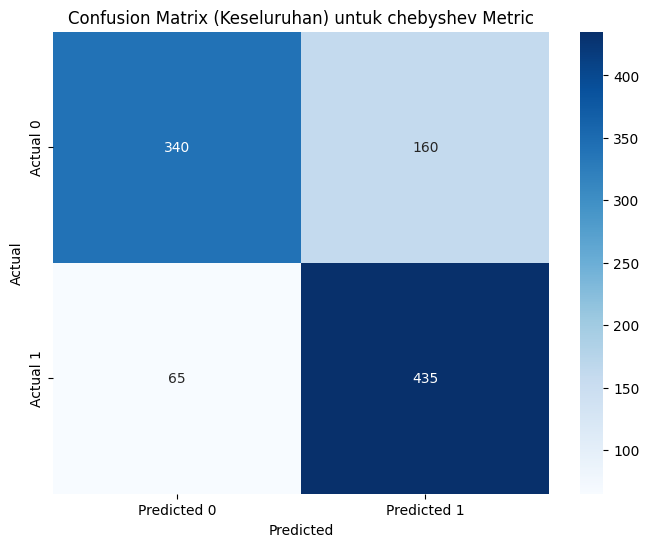

In [8]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Gunakan hanya chebyshev distance
distance_metrics = ['chebyshev']

# Inisialisasi KFold untuk Cross-Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

print("\n--- Evaluasi Model dengan Semua Fitur ---")
for metric_name in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric_name)

    f1_scores = []
    recall_scores = []
    precision_scores = []
    acc_scores = []

    # Simpan semua prediksi dan label sebenarnya
    all_y_true = []
    all_y_pred = []

    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Standardisasi fitur
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # Simpan hasil prediksi untuk total confusion matrix
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        # Hitung metrik evaluasi
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        acc_scores.append(acc)
        f1_scores.append(f1)
        recall_scores.append(recall)
        precision_scores.append(precision)

        # Tampilkan metrik per fold
        print(f"Fold - {fold+1}, {metric_name} all feature:")
        print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}\n")

    # Hitung rata-rata metrik
    acc_mean = np.mean(acc_scores)
    f1_mean = np.mean(f1_scores)
    recall_mean = np.mean(recall_scores)
    precision_mean = np.mean(precision_scores)

    results.append({
        'metric': metric_name,
        'features': 'all features',
        'accuracy': acc_mean,
        'f1': f1_mean,
        'recall': recall_mean,
        'precision': precision_mean
    })

    # Buat confusion matrix keseluruhan
    total_cm = confusion_matrix(all_y_true, all_y_pred)

    # Visualisasi heatmap confusion matrix keseluruhan
    plt.figure(figsize=(8,6))
    sns.heatmap(total_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix (Keseluruhan) untuk chebyshev Metric')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    # plt.savefig('chebyshev_confusion_matrix_total.png')
    plt.show()

# # Simpan hasil ke DataFrame dan CSV
# results_df = pd.DataFrame(results)
# print("\nRingkasan Hasil Cross-Validation:")
# print(results_df)
# results_df.to_csv('kNN_CrossVal.csv', index=False)

## **K = Best (No CrossVal)**

### All feature & Euclidean

All k results:
    k  accuracy
0   1     0.775
1   3     0.745
2   5     0.740
3   7     0.750
4   9     0.740
5  11     0.720
6  13     0.720
7  15     0.705
8  17     0.690
9  19     0.700

Optimal k value: 1

Evaluation Metrics for k=1:
Accuracy: 0.7750
Precision: 0.7188
Recall: 0.9109
F1 Score: 0.8035


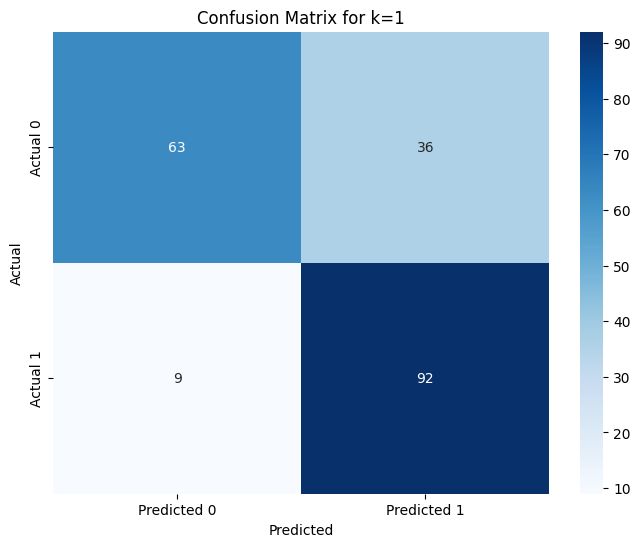

In [36]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List k ganjil dari 1 sampai 19
k_values = list(range(1, 20, 2))

# Menyimpan hasil akurasi tiap k
results = []

for k in k_values:
    # Buat model KNN dengan k
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)

    # Prediksi pada data test
    y_pred = knn.predict(X_test_scaled)

    # Hitung akurasi
    acc = accuracy_score(y_test, y_pred)
    results.append({'k': k, 'accuracy': acc})

# Buat DataFrame hasil
results_df = pd.DataFrame(results)
print("All k results:")
print(results_df)

# Cari k dengan akurasi terbaik
best_row = results_df.loc[results_df['accuracy'].idxmax()]
# Cast the best_k value to an integer
best_k = int(best_row['k'])
print(f"\nOptimal k value: {best_k}")

# Evaluasi model dengan k terbaik
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"\nEvaluation Metrics for k={best_k}:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for k={best_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### All feature & Manhattan

All k results:
    k  accuracy
0   1     0.800
1   3     0.755
2   5     0.730
3   7     0.735
4   9     0.745
5  11     0.730
6  13     0.715
7  15     0.725
8  17     0.725
9  19     0.740

Optimal k value: 1

Evaluation Metrics for k=1:
Accuracy: 0.8000
Precision: 0.7440
Recall: 0.9208
F1 Score: 0.8230


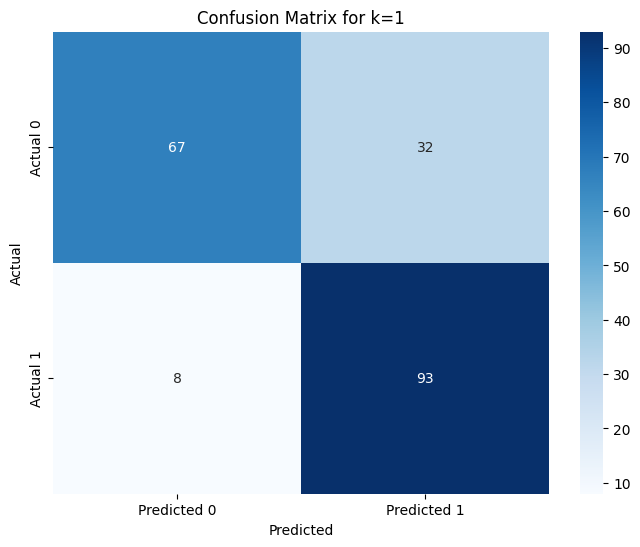

In [37]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List k ganjil dari 1 sampai 19
k_values = list(range(1, 20, 2))

# Menyimpan hasil akurasi tiap k
results = []

for k in k_values:
    # Buat model KNN dengan k
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train_scaled, y_train)

    # Prediksi pada data test
    y_pred = knn.predict(X_test_scaled)

    # Hitung akurasi
    acc = accuracy_score(y_test, y_pred)
    results.append({'k': k, 'accuracy': acc})

# Buat DataFrame hasil
results_df = pd.DataFrame(results)
print("All k results:")
print(results_df)

# Cari k dengan akurasi terbaik
best_row = results_df.loc[results_df['accuracy'].idxmax()]
# Cast the best_k value to an integer
best_k = int(best_row['k'])
print(f"\nOptimal k value: {best_k}")

# Evaluasi model dengan k terbaik
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"\nEvaluation Metrics for k={best_k}:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for k={best_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### All feature & Chebyshev

All k results:
    k  accuracy
0   1     0.775
1   3     0.750
2   5     0.715
3   7     0.730
4   9     0.710
5  11     0.710
6  13     0.705
7  15     0.690
8  17     0.690
9  19     0.675

Optimal k value: 1

Evaluation Metrics for k=1:
Accuracy: 0.7750
Precision: 0.7188
Recall: 0.9109
F1 Score: 0.8035


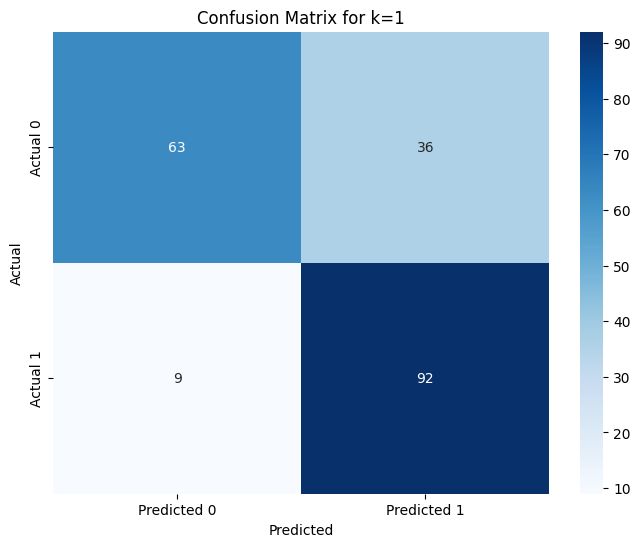

In [38]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List k ganjil dari 1 sampai 19
k_values = list(range(1, 20, 2))

# Menyimpan hasil akurasi tiap k
results = []

for k in k_values:
    # Buat model KNN dengan k
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train_scaled, y_train)

    # Prediksi pada data test
    y_pred = knn.predict(X_test_scaled)

    # Hitung akurasi
    acc = accuracy_score(y_test, y_pred)
    results.append({'k': k, 'accuracy': acc})

# Buat DataFrame hasil
results_df = pd.DataFrame(results)
print("All k results:")
print(results_df)

# Cari k dengan akurasi terbaik
best_row = results_df.loc[results_df['accuracy'].idxmax()]
# Cast the best_k value to an integer
best_k = int(best_row['k'])
print(f"\nOptimal k value: {best_k}")

# Evaluasi model dengan k terbaik
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='chebyshev')
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"\nEvaluation Metrics for k={best_k}:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for k={best_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **K = Best (CrossVal)**

### All feature & Euclidean


Hasil Grid Search untuk Semua Nilai K:
     k  mean_test_score  std_test_score
0    1         0.835711        0.019747
1    3         0.812737        0.026119
5   11         0.800954        0.027755
4    9         0.795948        0.024148
2    5         0.794121        0.029357
3    7         0.792959        0.027983
6   13         0.791371        0.029468
7   15         0.788999        0.030731
8   17         0.786137        0.029454
10  21         0.776516        0.027431
9   19         0.774975        0.027142

Best k: 1
Best F1 score: 0.8357

Ringkasan Hasil Cross-Validation dengan K Terbaik:
    fold     metric      features  accuracy        f1  recall  precision
0      1  euclidean  all features     0.790  0.810811   0.900   0.737705
1      2  euclidean  all features     0.790  0.814159   0.920   0.730159
2      3  euclidean  all features     0.860  0.867925   0.920   0.821429
3      4  euclidean  all features     0.790  0.807339   0.880   0.745763
4      5  euclidean  all featu

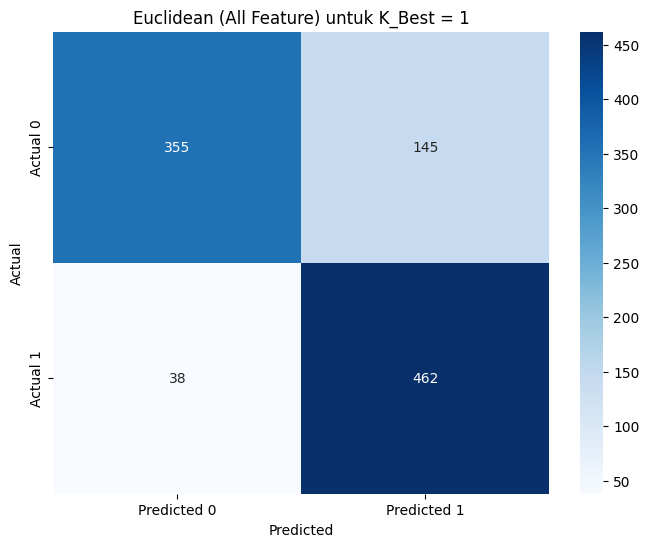

In [46]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Grid search untuk mencari nilai k terbaik (hanya ganjil dari 1 sampai 21)
param_grid = {'n_neighbors': list(range(1, 22, 2))}
knn = KNeighborsClassifier(metric='euclidean')
grid = GridSearchCV(knn, param_grid,
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
                    scoring='f1',
                    return_train_score=True)
grid.fit(X, y)

# Tampilkan semua nilai k yang diuji
results_df = pd.DataFrame({
    'k': grid.cv_results_['param_n_neighbors'],
    'mean_test_score': grid.cv_results_['mean_test_score'],
    'std_test_score': grid.cv_results_['std_test_score']
})
print("\nHasil Grid Search untuk Semua Nilai K:")
print(results_df.sort_values('mean_test_score', ascending=False))

best_k = grid.best_params_['n_neighbors']
print(f"\nBest k: {best_k}")
print(f"Best F1 score: {grid.best_score_:.4f}")

# Evaluasi ulang model dengan k terbaik
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

all_y_true = []
all_y_pred = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardisasi fitur
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    best_knn.fit(X_train, y_train)
    y_pred = best_knn.predict(X_test)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    results.append({
        'fold': fold+1,
        'metric': 'euclidean',
        'features': 'all features',
        'accuracy': acc,
        'f1': f1,
        'recall': recall,
        'precision': precision
    })

# Hitung rata-rata metrik
mean_results = {
    'fold': 'Mean',
    'metric': 'euclidean',
    'features': 'all features',
    'accuracy': np.mean([r['accuracy'] for r in results]),
    'f1': np.mean([r['f1'] for r in results]),
    'recall': np.mean([r['recall'] for r in results]),
    'precision': np.mean([r['precision'] for r in results])
}
results.append(mean_results)

# Tampilkan ringkasan hasil
results_df = pd.DataFrame(results)
print("\nRingkasan Hasil Cross-Validation dengan K Terbaik:")
print(f'{results_df}\n')

# # Simpan hasil ke CSV
# results_df.to_csv('/home/user/out_kNN_CrossVal_best_k.csv', index=False)

# Buat confusion matrix keseluruhan
total_cm = confusion_matrix(all_y_true, all_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(total_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Euclidean (All Feature) untuk K_Best = {best_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.savefig('/home/user/out_euclidean_confusion_matrix_total_best_k.png')
plt.show()

### All feature & Manhattan


Hasil Grid Search untuk Semua Nilai K:
     k  mean_test_score  std_test_score
0    1         0.842461        0.019356
1    3         0.816983        0.026177
3    7         0.803205        0.026435
2    5         0.801175        0.023112
5   11         0.794261        0.031105
8   17         0.793555        0.032002
6   13         0.792678        0.036209
7   15         0.790532        0.036665
9   19         0.789896        0.028095
4    9         0.787602        0.026457
10  21         0.786834        0.027662

Best k: 1
Best F1 score: 0.8425

Ringkasan Hasil Cross-Validation dengan K Terbaik:
    fold     metric      features  accuracy        f1  recall  precision
0      1  manhattan  all features     0.820  0.836364   0.920   0.766667
1      2  manhattan  all features     0.800  0.821429   0.920   0.741935
2      3  manhattan  all features     0.840  0.849057   0.900   0.803571
3      4  manhattan  all features     0.760  0.777778   0.840   0.724138
4      5  manhattan  all featu

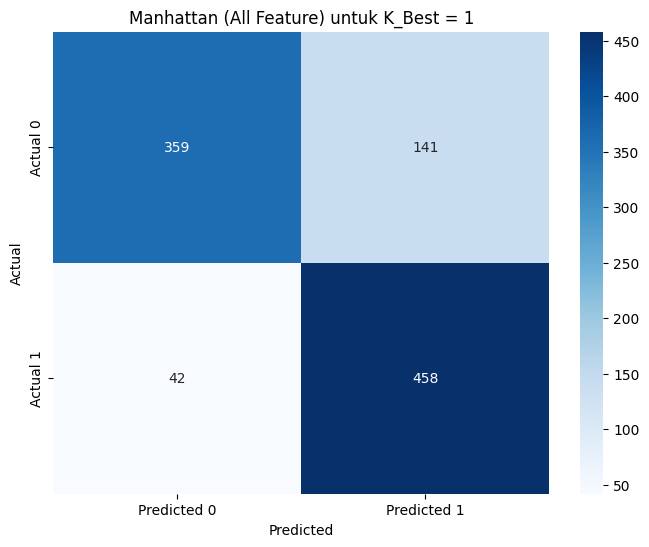

In [47]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Grid search untuk mencari nilai k terbaik (hanya ganjil dari 1 sampai 21)
param_grid = {'n_neighbors': list(range(1, 22, 2))}
knn = KNeighborsClassifier(metric='manhattan')
grid = GridSearchCV(knn, param_grid,
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
                    scoring='f1',
                    return_train_score=True)
grid.fit(X, y)

# Tampilkan semua nilai k yang diuji
results_df = pd.DataFrame({
    'k': grid.cv_results_['param_n_neighbors'],
    'mean_test_score': grid.cv_results_['mean_test_score'],
    'std_test_score': grid.cv_results_['std_test_score']
})
print("\nHasil Grid Search untuk Semua Nilai K:")
print(results_df.sort_values('mean_test_score', ascending=False))

best_k = grid.best_params_['n_neighbors']
print(f"\nBest k: {best_k}")
print(f"Best F1 score: {grid.best_score_:.4f}")

# Evaluasi ulang model dengan k terbaik
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

all_y_true = []
all_y_pred = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardisasi fitur
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    best_knn.fit(X_train, y_train)
    y_pred = best_knn.predict(X_test)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    results.append({
        'fold': fold+1,
        'metric': 'manhattan',
        'features': 'all features',
        'accuracy': acc,
        'f1': f1,
        'recall': recall,
        'precision': precision
    })

# Hitung rata-rata metrik
mean_results = {
    'fold': 'Mean',
    'metric': 'manhattan',
    'features': 'all features',
    'accuracy': np.mean([r['accuracy'] for r in results]),
    'f1': np.mean([r['f1'] for r in results]),
    'recall': np.mean([r['recall'] for r in results]),
    'precision': np.mean([r['precision'] for r in results])
}
results.append(mean_results)

# Tampilkan ringkasan hasil
results_df = pd.DataFrame(results)
print("\nRingkasan Hasil Cross-Validation dengan K Terbaik:")
print(f'{results_df}\n')

# # Simpan hasil ke CSV
# results_df.to_csv('/home/user/out_kNN_CrossVal_best_k.csv', index=False)

# Buat confusion matrix keseluruhan
total_cm = confusion_matrix(all_y_true, all_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(total_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Manhattan (All Feature) untuk K_Best = {best_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.savefig('/home/user/out_manhattan_confusion_matrix_total_best_k.png')
plt.show()

### All feature & Chebyshev


Hasil Grid Search untuk Semua Nilai K:
     k  mean_test_score  std_test_score
0    1         0.838086        0.029810
1    3         0.806214        0.032381
2    5         0.790122        0.040749
4    9         0.785091        0.041110
5   11         0.784782        0.035538
6   13         0.780715        0.035036
7   15         0.779462        0.033480
3    7         0.777338        0.045070
8   17         0.771456        0.036582
9   19         0.769923        0.037196
10  21         0.768944        0.042772

Best k: 1
Best F1 score: 0.8381

Ringkasan Hasil Cross-Validation dengan K Terbaik:
    fold     metric      features  accuracy        f1  recall  precision
0      1  chebyshev  all features     0.790  0.810811    0.90   0.737705
1      2  chebyshev  all features     0.750  0.786325    0.92   0.686567
2      3  chebyshev  all features     0.820  0.839286    0.94   0.758065
3      4  chebyshev  all features     0.830  0.838095    0.88   0.800000
4      5  chebyshev  all featu

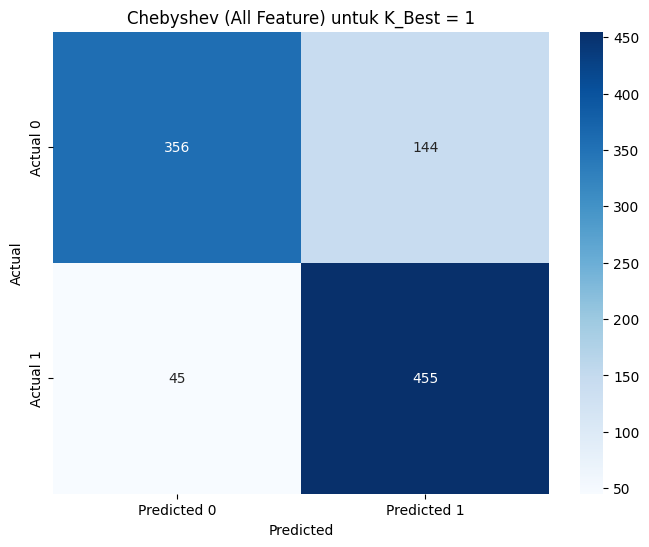

In [49]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Grid search untuk mencari nilai k terbaik (hanya ganjil dari 1 sampai 21)
param_grid = {'n_neighbors': list(range(1, 22, 2))}
knn = KNeighborsClassifier(metric='chebyshev')
grid = GridSearchCV(knn, param_grid,
                    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
                    scoring='f1',
                    return_train_score=True)
grid.fit(X, y)

# Tampilkan semua nilai k yang diuji
results_df = pd.DataFrame({
    'k': grid.cv_results_['param_n_neighbors'],
    'mean_test_score': grid.cv_results_['mean_test_score'],
    'std_test_score': grid.cv_results_['std_test_score']
})
print("\nHasil Grid Search untuk Semua Nilai K:")
print(results_df.sort_values('mean_test_score', ascending=False))

best_k = grid.best_params_['n_neighbors']
print(f"\nBest k: {best_k}")
print(f"Best F1 score: {grid.best_score_:.4f}")

# Evaluasi ulang model dengan k terbaik
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='chebyshev')
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

all_y_true = []
all_y_pred = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardisasi fitur
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    best_knn.fit(X_train, y_train)
    y_pred = best_knn.predict(X_test)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    results.append({
        'fold': fold+1,
        'metric': 'chebyshev',
        'features': 'all features',
        'accuracy': acc,
        'f1': f1,
        'recall': recall,
        'precision': precision
    })

# Hitung rata-rata metrik
mean_results = {
    'fold': 'Mean',
    'metric': 'chebyshev',
    'features': 'all features',
    'accuracy': np.mean([r['accuracy'] for r in results]),
    'f1': np.mean([r['f1'] for r in results]),
    'recall': np.mean([r['recall'] for r in results]),
    'precision': np.mean([r['precision'] for r in results])
}
results.append(mean_results)

# Tampilkan ringkasan hasil
results_df = pd.DataFrame(results)
print("\nRingkasan Hasil Cross-Validation dengan K Terbaik:")
print(f'{results_df}\n')

# # Simpan hasil ke CSV
# results_df.to_csv('/home/user/out_kNN_CrossVal_best_k.csv', index=False)

# Buat confusion matrix keseluruhan
total_cm = confusion_matrix(all_y_true, all_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(total_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Chebyshev (All Feature) untuk K_Best = {best_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.savefig('/home/user/out_chebyshev_confusion_matrix_total_best_k.png')
plt.show()

# **SVM**

# **LOGISTIC REGRESSION**